# Applying Logistic Regression and SVM

Regresi logistik adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (dua kategori) dan satu atau lebih variabel independen (prediktor). Tujuannya adalah untuk memprediksi probabilitas terjadinya salah satu dari dua kategori (biasanya 0 dan 1) berdasarkan variabel independen. Dalam artikel ini, saya akan menjelaskan regresi logistik secara komprehensif.

## Konsep Dasar Regresi Logistik

- Regresi logistik adalah salah satu bentuk regresi yang digunakan untuk tugas klasifikasi. Ini berbeda dari regresi linear, yang digunakan untuk memprediksi variabel kontinu.
- Output regresi logistik adalah probabilitas bahwa suatu observasi termasuk dalam salah satu dari dua kategori. Probabilitas ini diukur dalam rentang [0, 1].
- Regresi logistik memanfaatkan fungsi logistik (sigmoid) untuk mengubah hasil dari garis linear menjadi probabilitas. Fungsi logistik memiliki bentuk S yang khas.

### Logistic Regression in Scikit Learn

In [3]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9662921348314607

**insight:**
- akurasi data train dan data uji sebesar 97%
- logistic regression juga dapat menampilkan skor kepercayaan 

In [4]:
lr.predict_proba(wine.data[:1])

array([[9.96573165e-01, 2.74629009e-03, 6.80544953e-04]])

**insight:**
- pada klasifikasi diketahui bahwa selang kepercayaan lebih dari 99%

### SVM in Scikit Learn

- dalam scikit learn, SVM disebut sebagai LinearSVC

In [5]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7696629213483146

### SVC in Scikit Learn

In [6]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
from sklearn.svm import SVC
svm =SVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

0.7078651685393258

#### Kompleksitas Model 

- Underfitting menunjukan bahwa model terlalu sederhana, menyebabkan akurasi pelatihan yang rendah
- Overfitting menunujukan bahwa model terlalu kompleks, menyebabkan akurasi data uji yang rendah

### Logistic Regression vs SVM vs SVC

- Logistic regression adalah model linier yang baik untuk klasifikasi biner dan umumnya mudah diinterpretasikan. 
- Linear SVC adalah model linier yang dapat digunakan dalam tugas klasifikasi biner dan toleran terhadap outliers. 
- SVC adalah model yang dapat mengatasi tugas klasifikasi multikelas dan memiliki fleksibilitas untuk pemisahan data non-linier saat digunakan dengan kernel yang sesuai. 

Pilihan antara ketiganya tergantung pada karakteristik data dan masalah yang dihadapi.

### Exercise 

**Running LogisticRegression and SVC**

In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.

- Apply logistic regression and SVM (using SVC()) to the handwritten digits data set using the provided train/validation split.
- For each classifier, print out the training and validation accuracy.

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0
0.9622222222222222
0.9962880475129918
0.9866666666666667


> Nicely done! Later in the course we'll look at the similarities and differences of logistic regression vs. SVMs.

## Linear Classifiers

Linear classifier adalah jenis algoritma klasifikasi dalam machine learning yang berusaha memisahkan dua kelas (kategorikal) dalam data dengan menggunakan fungsi pemisah linier. Ini berarti algoritma mencoba untuk membuat batas keputusan linier yang memisahkan observasi dalam satu kelas dari observasi dalam kelas lain dalam ruang fitur (feature space).

- Fungsi Pemisah Linear menggambarkan batas keputusan antara dua kelas. Fungsi ini sering berbentuk hyperplane dalam ruang fitur dengan dimensi yang sesuai. Dalam kasus klasifikasi biner, hyperplane ini adalah garis lurus. Untuk klasifikasi multikelas, ini adalah hiperbidang linier dengan dimensi yang sesuai.

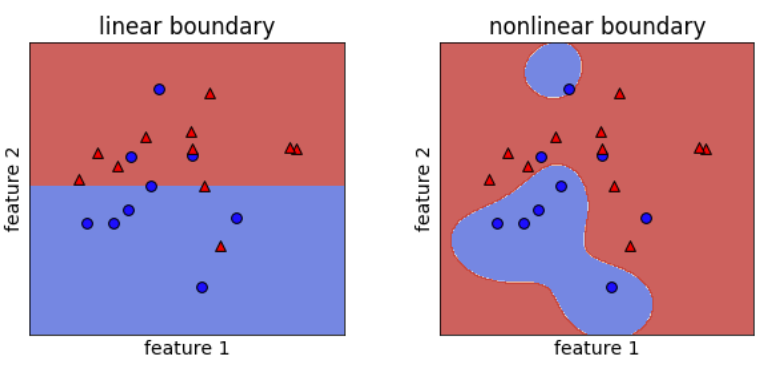

- pada gambar diatas, klasifikasi memprediksi kelas biru di area arsir biru yaitu feature 2 kecil,  dan merah di kelas di area yang diarsir merah, dimana feature 2 besar. 
- garis pemisah antara dua wilayah disebut dengan batas keputusan, yang tampak linear karena seperti garis horizontal. Namun garis yang ada bisa dalam orientasi apapun. Misal dengan menggunakan 5 Feature artinya akan menjadi 5 dimensi, yang sulit diinterpretasikan. Untuk itu batasnya akan diubah menjadi hyperlane yang berdimensi tinggi. 
- jenis batas lainnya adalah batas nonlinear. 

#### Terminologi 

- Decision Boundary : batas yang memisahkan dua kategori atau kelas dalam masalah klasifikasi. Ini adalah garis, kurva, atau permukaan yang memutuskan mana setiap titik data harus masuk ke dalam salah satu kelas. Decision boundary bisa berbentuk garis lurus sederhana jika masalahnya linear, atau bisa lebih kompleks seperti kurva atau permukaan jika masalahnya non-linear. Tujuan dari pembelajaran mesin adalah menemukan decision boundary yang sesuai sehingga dapat melakukan klasifikasi dengan akurasi yang tinggi.
    
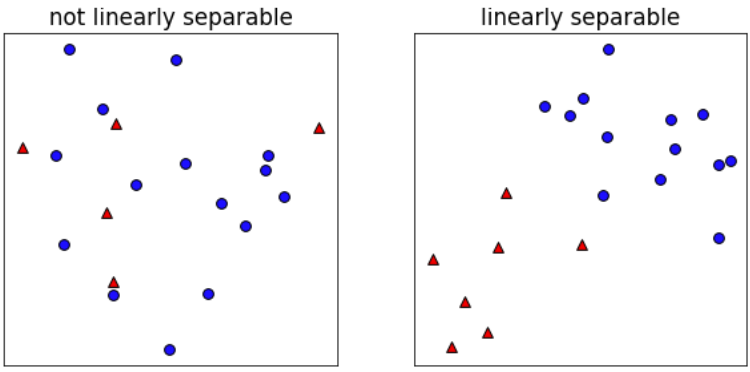

- Linear Classifier :  linear classifier adalah algoritma klasifikasi yang menggunakan garis lurus atau bidang datar sebagai decision boundary untuk memisahkan data ke dalam dua kategori berdasarkan fitur-fitur yang diamati. 
    - Contoh sederhana dari linear classifier adalah Regresi Logistik, yang digunakan dalam klasifikasi biner. Regresi Logistik mencoba membuat garis lurus untuk memisahkan dua kategori data. Jika data berada di atas garis tersebut, itu akan diklasifikasikan ke dalam satu kategori, dan jika berada di bawah garis, akan diklasifikasikan ke dalam kategori lain.

### Exercise 

**1. Which decision boundary is linear?**

Which of the following is a linear decision boundary?

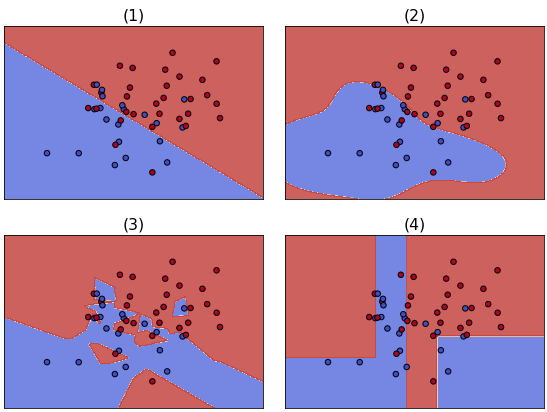

ANS : (1)

**Visualizing decision boundaries**

In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into X, along with binary labels in y.

- Create the following classifier objects with default hyperparameters: LogisticRegression, LinearSVC, SVC, KNeighborsClassifier.
- Fit each of the classifiers on the provided data using a for loop.
- Call the plot_4_classifers() function (similar to the code here), passing in X, y, and a list containing the four classifiers.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#hide
X = np.array([[11.45,  2.4 ],
       [13.62,  4.95],
       [13.88,  1.89],
       [12.42,  2.55],
       [12.81,  2.31],
       [12.58,  1.29],
       [13.83,  1.57],
       [13.07,  1.5 ],
       [12.7 ,  3.55],
       [13.77,  1.9 ],
       [12.84,  2.96],
       [12.37,  1.63],
       [13.51,  1.8 ],
       [13.87,  1.9 ],
       [12.08,  1.39],
       [13.58,  1.66],
       [13.08,  3.9 ],
       [11.79,  2.13],
       [12.45,  3.03],
       [13.68,  1.83],
       [13.52,  3.17],
       [13.5 ,  3.12],
       [12.87,  4.61],
       [14.02,  1.68],
       [12.29,  3.17],
       [12.08,  1.13],
       [12.7 ,  3.87],
       [11.03,  1.51],
       [13.32,  3.24],
       [14.13,  4.1 ],
       [13.49,  1.66],
       [11.84,  2.89],
       [13.05,  2.05],
       [12.72,  1.81],
       [12.82,  3.37],
       [13.4 ,  4.6 ],
       [14.22,  3.99],
       [13.72,  1.43],
       [12.93,  2.81],
       [11.64,  2.06],
       [12.29,  1.61],
       [11.65,  1.67],
       [13.28,  1.64],
       [12.93,  3.8 ],
       [13.86,  1.35],
       [11.82,  1.72],
       [12.37,  1.17],
       [12.42,  1.61],
       [13.9 ,  1.68],
       [14.16,  2.51]])

y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])

In [12]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [13]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [14]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [15]:
def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25844\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25844\975142573.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25844\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25844\975142573.py:24: UserWarning: No data for colormapping provided 

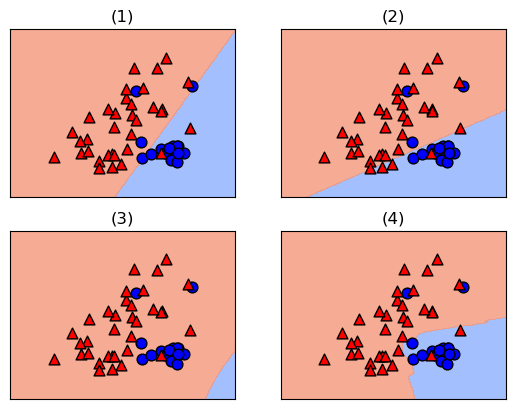

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(),
               SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

> Nice! As you can see, logistic regression and linear SVM are linear classifiers whereas KNN is not. The default SVM is also non-linear, but this is hard to see in the plot because it performs poorly with default hyperparameters. With better hyperparameters, it performs well.